In [1]:
%matplotlib inline
from pathlib import Path

from scipy import stats
from sklearn.utils import resample

import matplotlib.pylab as plt



from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common 
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
Path().resolve()

WindowsPath('C:/Users/INDHRNA/Desktop/ML/practical_statistics_Python_BRUCE/Indhra-version')

In [4]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

In [5]:
np.random.seed(seed=1)

In [11]:
x=np.linspace(-50,50,50)
x

array([-50.        , -47.95918367, -45.91836735, -43.87755102,
       -41.83673469, -39.79591837, -37.75510204, -35.71428571,
       -33.67346939, -31.63265306, -29.59183673, -27.55102041,
       -25.51020408, -23.46938776, -21.42857143, -19.3877551 ,
       -17.34693878, -15.30612245, -13.26530612, -11.2244898 ,
        -9.18367347,  -7.14285714,  -5.10204082,  -3.06122449,
        -1.02040816,   1.02040816,   3.06122449,   5.10204082,
         7.14285714,   9.18367347,  11.2244898 ,  13.26530612,
        15.30612245,  17.34693878,  19.3877551 ,  21.42857143,
        23.46938776,  25.51020408,  27.55102041,  29.59183673,
        31.63265306,  33.67346939,  35.71428571,  37.75510204,
        39.79591837,  41.83673469,  43.87755102,  45.91836735,
        47.95918367,  50.        ])

In [10]:
xsample = stats.norm.rvs(size=1000)
xsample

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

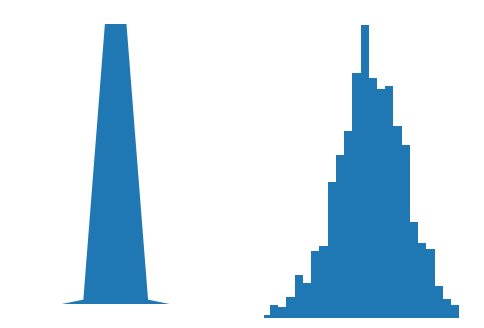

In [18]:
fig, ax = plt.subplots(ncols=2,figsize=(6,4))
ax1 = ax[0]
ax1.fill(x,stats.norm.pdf(x))
ax1.set_axis_off()
ax1.set_xlim(-10,10)
ax2 = ax[1]
ax2.hist(xsample,bins=30)
ax2.set_xlim(-3,3)
ax2.set_axis_off()

ax2.set_position
plt.show()

In [19]:
## sampling distribution of a statistic

In [21]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [23]:
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'data'
    
})
sample_data.head()

,income,type
33798,89000,data
36591,80000,data
36202,37500,data
37792,56000,data
32112,156000,data


In [24]:
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'mean of 5'
})
sample_mean_05.head()

,income,type
0,56200.0,mean of 5
1,45000.0,mean of 5
2,73000.0,mean of 5
3,65200.0,mean of 5
4,93600.0,mean of 5


In [25]:
sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'mean of 20'
})
sample_mean_20.head()

,income,type
0,60432.05,mean of 20
1,69336.60,mean of 20
2,72635.50,mean of 20
3,69729.80,mean of 20
4,71015.60,mean of 20


In [26]:
results = pd.concat([sample_data,sample_mean_05,sample_mean_20])
results.head()

,income,type
33798,89000.0,data
36591,80000.0,data
36202,37500.0,data
37792,56000.0,data
32112,156000.0,data


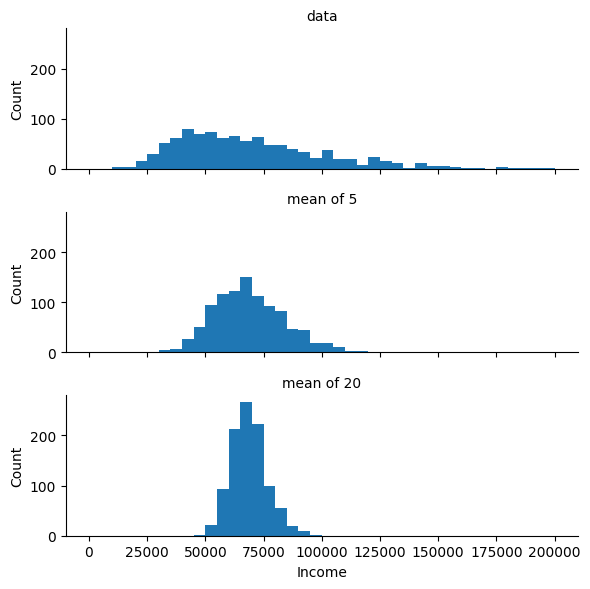

In [28]:
g = sns.FacetGrid(results, col='type', col_wrap=1,height=2,aspect=3)
g.map(plt.hist,'income', range=[0,200000], bins=40)
g.set_axis_labels('Income','Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [ ]:
"""
echo "# Practical_Statistics_for_DataSciecne" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/indhra/Practical_Statistics_for_DataSciecne.git
git push -u origin main
"""